# Salud del sueño y estilo de vida.

Es un dataset sintético generado con fines educativos y analíticos. Los datos no proceden de ninguna institución del mundo real, sino que se han creado para simular escenarios realistas para analizar los factores de rendimiento de los estudiantes.

### Preguntas a responder:

* ¿Quiénes tienen peor calidad de sueño, hombres o mujeres?
* ¿Existe una relación entre la calidad de sueño y la profesión de la persona? 
* ¿Cómo impacta el nivel de estrés en la duración y calidad del sueño?
* ¿Cómo influye el sueño en el ritmo cardíaco y la presión arterial?
* ¿Existe una correlación entre el nivel de actividad física y la calidad del sueño?
* ¿Qué factores están asociados con la aparición de trastornos del sueño?

In [740]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
sns.set_theme(style="darkgrid")

In [741]:
ds=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
ds

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [742]:
ds.info()
ds[ds.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


In [743]:
ds.drop(columns=['Person ID'], inplace=True)
ds.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [744]:
print(ds['Sleep Disorder'].value_counts())

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [745]:
ds['Sleep Disorder'] = ds['Sleep Disorder'].fillna('None')
print(ds['Sleep Disorder'].value_counts())

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [746]:
ds[['Systolic', 'Diastolic']] = ds['Blood Pressure'].str.split('/', expand=True)

ds['Systolic'] = pd.to_numeric(ds['Systolic'], errors='coerce')
ds['Diastolic'] = pd.to_numeric(ds['Diastolic'], errors='coerce')
ds.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [747]:
ds.loc[ds['Age'] <= 39, 'Age_Group']='Adult'
ds.loc[ds['Age'] >= 40, 'Age_Group']='Middle_Adult'
ds.loc[(ds['Systolic'] < 120) | (ds['Diastolic'] < 80), 'Blood_Pressure_Group'] = 'Normal'
ds.loc[(ds['Systolic'].between(120, 129)) | (ds['Diastolic'] < 80), 'Blood_Pressure_Group'] = 'Elevated'
ds.loc[(ds['Systolic'].between(130, 139)) | (ds['Diastolic'].between(80, 89)), 'Blood_Pressure_Group'] = 'High_BP_Stage_1'
ds.loc[(ds['Systolic'] >= 140) | (ds['Diastolic'] >= 90), 'Blood_Pressure_Group'] = 'High_BP_Stage_2'
ds.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Age_Group,Blood_Pressure_Group
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,Adult,High_BP_Stage_1
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Adult,High_BP_Stage_1
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Adult,High_BP_Stage_1
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Adult,High_BP_Stage_2
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Adult,High_BP_Stage_2


In [748]:
print(ds['Blood_Pressure_Group'].value_counts())

Blood_Pressure_Group
High_BP_Stage_1    232
High_BP_Stage_2    100
Elevated            42
Name: count, dtype: int64


In [749]:
print(ds['Physical Activity Level'].min(), ds['Physical Activity Level'].max())

30 90


In [750]:
ds.loc[ds['Physical Activity Level'].between(30,50), 'PA_Level_Group']='Low_Activity'
ds.loc[ds['Physical Activity Level'].between(51,70), 'PA_Level_Group']='Moderate_Activity'
ds.loc[ds['Physical Activity Level'].between(71,90), 'PA_Level_Group']='High_Activity'
ds.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Age_Group,Blood_Pressure_Group,PA_Level_Group
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,Adult,High_BP_Stage_1,Low_Activity
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Adult,High_BP_Stage_1,Moderate_Activity
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Adult,High_BP_Stage_1,Moderate_Activity
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Adult,High_BP_Stage_2,Low_Activity
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Adult,High_BP_Stage_2,Low_Activity


## Outliers

<Axes: ylabel='Heart Rate'>

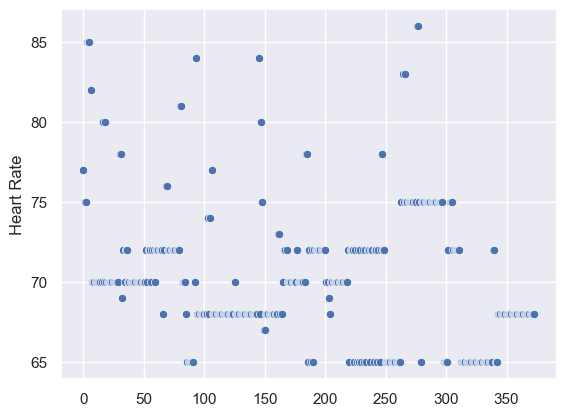

In [751]:
sns.scatterplot(ds['Heart Rate'])

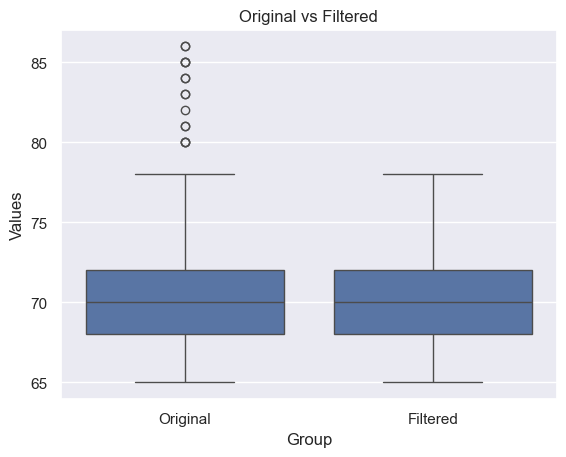

In [752]:
# Cálculo de los límites basados en el rango intercuartil
Q1=ds['Heart Rate'].quantile(0.25)
Q3=ds['Heart Rate'].quantile(0.75)
IQR=Q3-Q1
lim_inf=Q1-1.5*IQR
lim_sup=Q3+1.5*IQR

ds_filtered=ds[(ds['Heart Rate'] >= lim_inf) & (ds['Heart Rate'] <= lim_sup)]

#Para comparar dos grupos de datos (los originales y los filtrados)
df = pd.DataFrame({'Values': np.concatenate([ds['Heart Rate'], ds_filtered['Heart Rate']]),
                   'Group': ['Original'] * len(ds) + ['Filtered'] * len(ds_filtered)})

sns.boxplot(x='Group', y='Values', data=df)
plt.title('Original vs Filtered')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

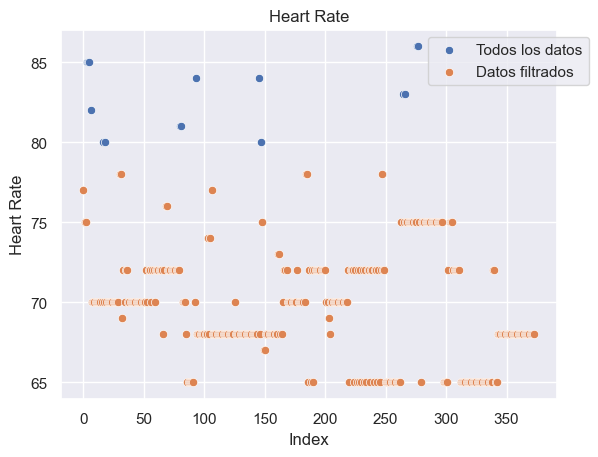

In [753]:
sns.scatterplot(ds['Heart Rate'], label='Todos los datos')
sns.scatterplot(ds_filtered['Heart Rate'], label='Datos filtrados')

plt.title("Heart Rate")
plt.xlabel("Index")
plt.ylabel("Heart Rate")
plt.legend(loc='upper right',bbox_to_anchor=(1.08, 1))
plt.show

## Análisis de datos

### Edades

In [754]:
ds.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [755]:
ds['Age'].mean()

np.float64(42.18449197860963)

In [756]:
ds['Age'].std()

np.float64(8.673133465547243)

### Profesión

In [757]:
ds.groupby('Occupation')['Gender'].value_counts()

Occupation            Gender
Accountant            Female    36
                      Male       1
Doctor                Male      69
                      Female     2
Engineer              Female    32
                      Male      31
Lawyer                Male      45
                      Female     2
Manager               Female     1
Nurse                 Female    73
Sales Representative  Male       2
Salesperson           Male      32
Scientist             Female     4
Software Engineer     Male       4
Teacher               Female    35
                      Male       5
Name: count, dtype: int64

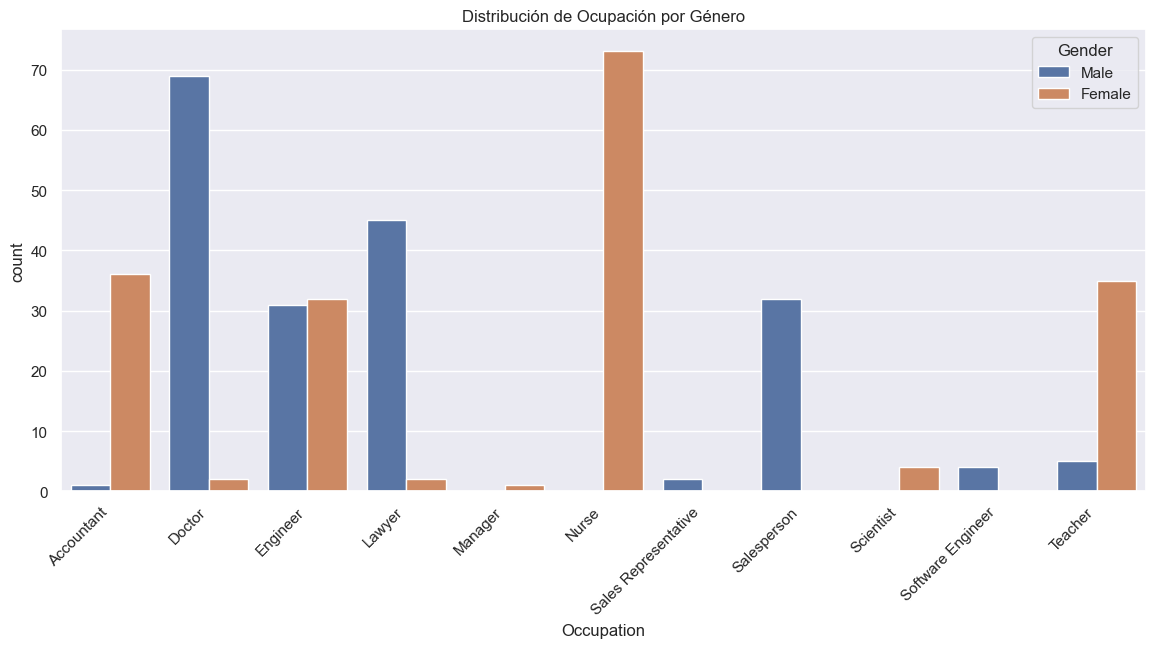

In [758]:
plt.figure(figsize=(14, 6))
sns.countplot(ds.sort_values('Occupation'), x='Occupation', hue='Gender')
plt.title('Distribución de Ocupación por Género')
plt.xticks(rotation=45, ha='right')
plt.show()

In [759]:
occ_stres=ds.groupby('Occupation')['Stress Level'].mean()
occ_stres.sort_values(ascending=False)

Occupation
Sales Representative    8.000000
Salesperson             7.000000
Scientist               7.000000
Doctor                  6.732394
Software Engineer       6.000000
Nurse                   5.547945
Lawyer                  5.063830
Manager                 5.000000
Accountant              4.594595
Teacher                 4.525000
Engineer                3.888889
Name: Stress Level, dtype: float64

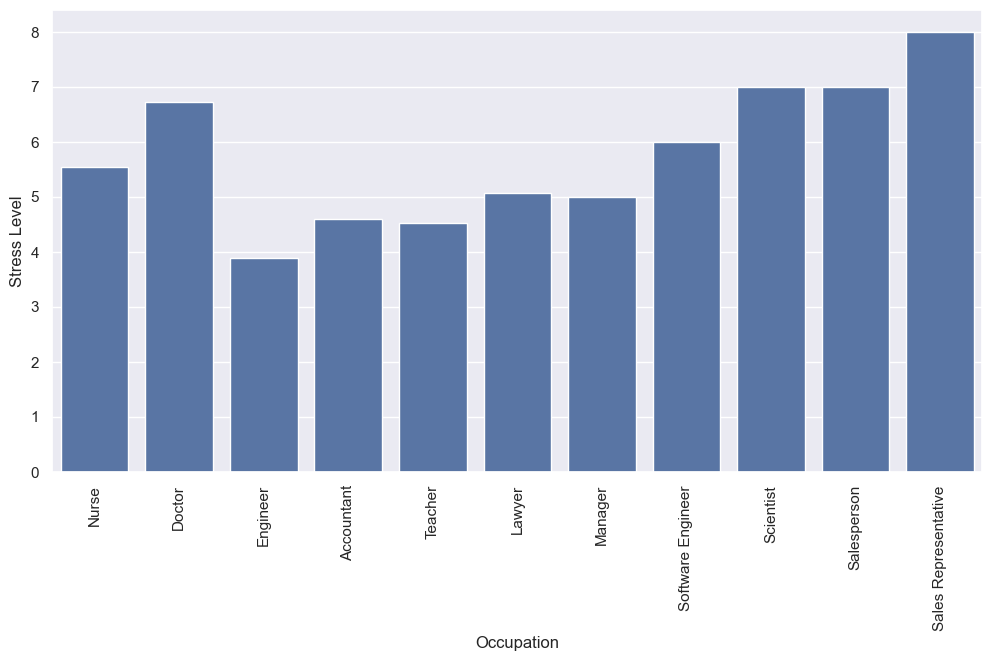

In [760]:
plt.figure(figsize=(12,6))
sns.barplot(ds.sort_values('Stress Level'), x='Occupation', y='Stress Level', errorbar=None)
plt.title('')
plt.xticks(rotation=90)
plt.xticks()
plt.show()

### Duración y calidad de sueño

In [761]:
print(ds['Sleep Duration'].min(), ds['Sleep Duration'].max())
print(ds['Quality of Sleep'].min(), ds['Quality of Sleep'].max())

5.8 8.5
4 9


In [762]:
ds.groupby('Gender')[['Sleep Duration', 'Quality of Sleep']].mean()

,Sleep Duration,Quality of Sleep
Gender,,
Female,7.229730,7.664865
Male,7.036508,6.968254


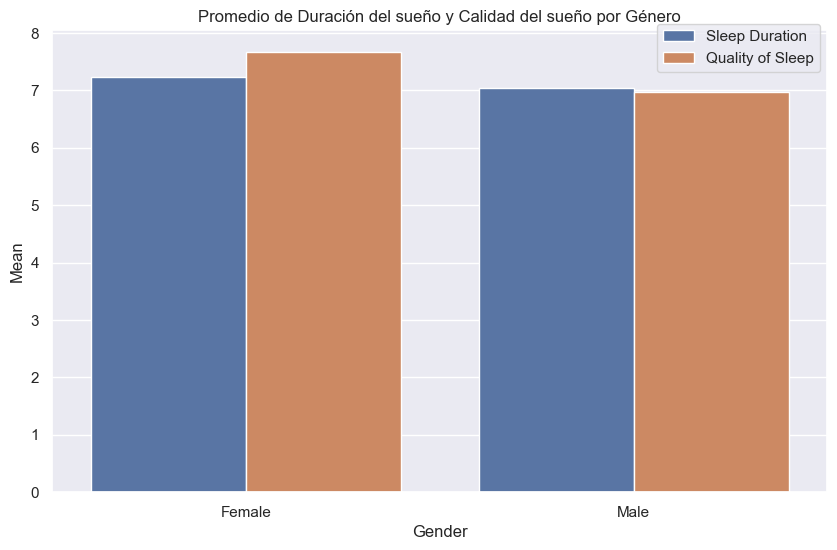

In [763]:
gender_qua = ds.groupby('Gender')[['Sleep Duration', 'Quality of Sleep']].mean().reset_index()
gender_qua_melted = gender_qua.melt(id_vars='Gender', var_name='Metric', value_name='Mean')
plt.figure(figsize=(10, 6))
sns.barplot(gender_qua_melted, x='Gender', y='Mean', hue='Metric')
plt.legend(bbox_to_anchor=(1, 1.03))
plt.title('Promedio de Duración del sueño y Calidad del sueño por Género')
plt.show()

In [764]:
occ_sleep=ds.groupby('Occupation')[['Sleep Duration', 'Quality of Sleep']].mean()
occ_sleep.sort_values(by='Quality of Sleep', ascending=False)

,Sleep Duration,Quality of Sleep
Occupation,,
Engineer,7.987302,8.412698
Lawyer,7.410638,7.893617
Accountant,7.113514,7.891892
Nurse,7.063014,7.369863
Manager,6.900000,7.000000
Teacher,6.690000,6.975000
Doctor,6.970423,6.647887
Software Engineer,6.750000,6.500000
Salesperson,6.403125,6.000000


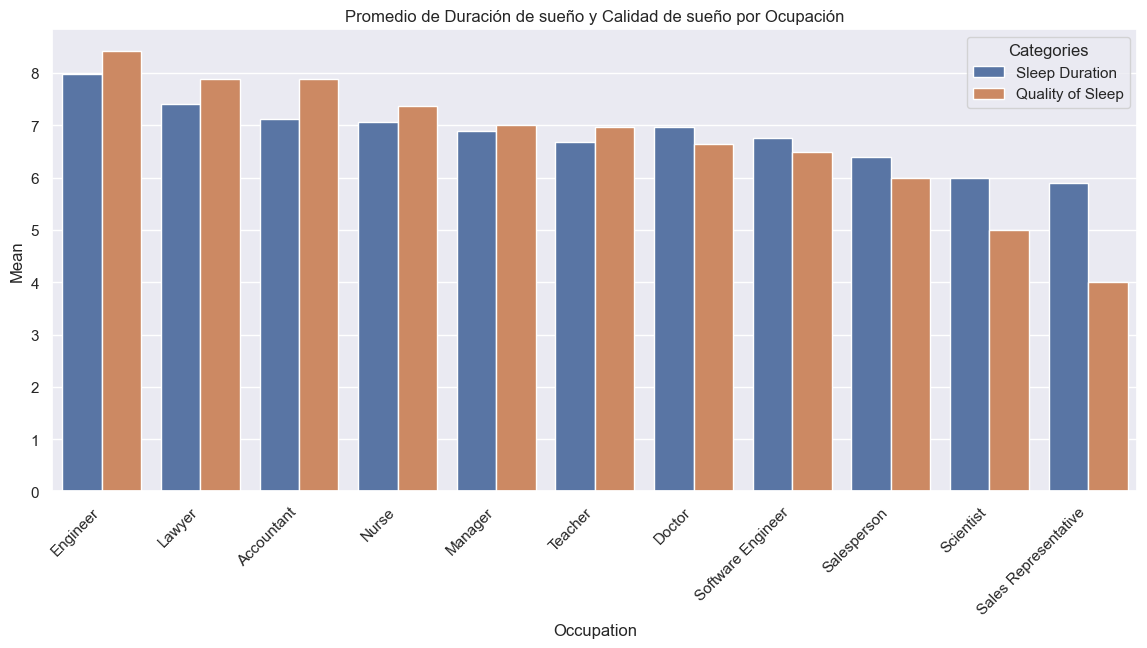

In [765]:
occ_dq = ds.groupby('Occupation')[['Sleep Duration', 'Quality of Sleep']].mean().reset_index()
occ_dq = occ_dq.sort_values(by='Quality of Sleep', ascending=False)
occ_dq_melted = occ_dq.melt(id_vars='Occupation', var_name='Categories', value_name='Mean')

plt.figure(figsize=(14, 6))
sns.barplot(occ_dq_melted, x='Occupation', y='Mean', hue='Categories', errorbar=None)
plt.title('Promedio de Duración de sueño y Calidad de sueño por Ocupación')
plt.xticks(rotation=45, ha='right')
plt.show()

### Estrés

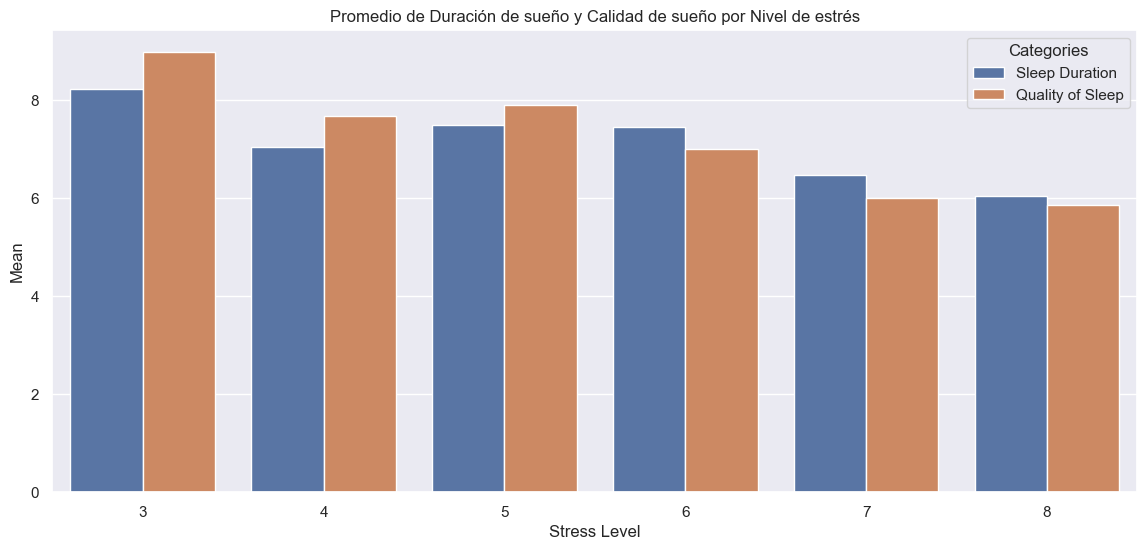

In [766]:
stress_sleep = ds.groupby('Stress Level')[['Sleep Duration', 'Quality of Sleep']].mean().reset_index()
stress_sleep = stress_sleep.sort_values(by='Quality of Sleep')
stress_sleep_melted = stress_sleep.melt(id_vars='Stress Level', var_name='Categories', value_name='Mean')

plt.figure(figsize=(14, 6))
sns.barplot(stress_sleep_melted, x='Stress Level', y='Mean', hue='Categories')
plt.title('Promedio de Duración de sueño y Calidad de sueño por Nivel de estrés')
plt.show()

### Actividad física y salud

In [767]:
heart_dq=ds.groupby('Heart Rate')[['Sleep Duration', 'Quality of Sleep']].mean()
heart_dq.sort_values(by='Quality of Sleep', ascending=False)

,Sleep Duration,Quality of Sleep
Heart Rate,,
67,8.000000,9.000000
86,8.100000,9.000000
68,7.523404,8.329787
65,7.577612,8.104478
73,7.200000,8.000000
70,7.561842,7.394737
69,7.400000,7.000000
83,7.300000,7.000000
84,7.400000,7.000000


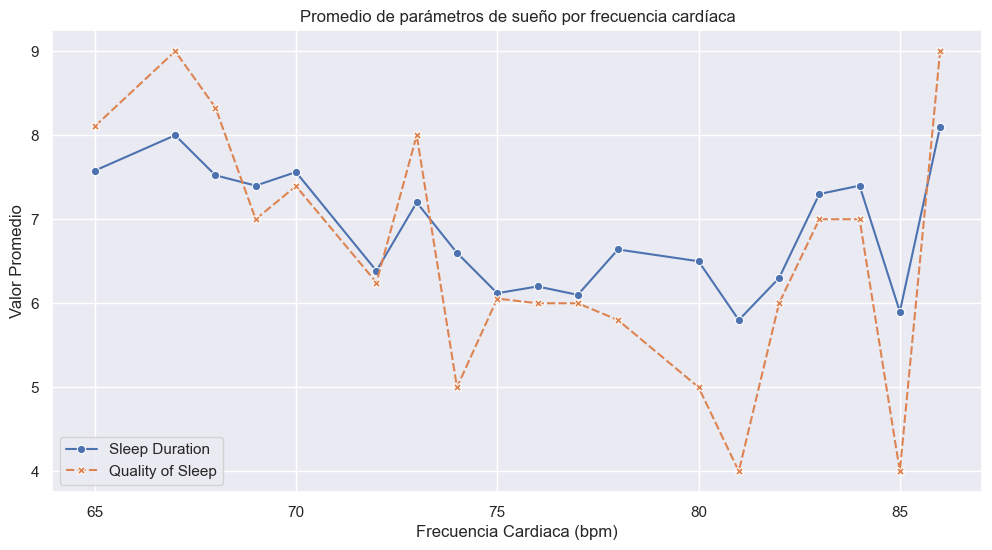

In [768]:
plt.figure(figsize=(12, 6))
sns.lineplot(heart_dq, markers=True)
plt.title('Promedio de parámetros de sueño por frecuencia cardíaca')
plt.ylabel('Valor Promedio')
plt.xlabel('Frecuencia Cardiaca (bpm)')
plt.show()


In [769]:
bpg_qua=ds.groupby('Blood_Pressure_Group')[['Sleep Duration', 'Quality of Sleep']].mean()
bpg_qua.sort_values(by='Quality of Sleep', ascending=False)

,Sleep Duration,Quality of Sleep
Blood_Pressure_Group,,
Elevated,7.269048,8.047619
High_BP_Stage_2,6.941000,7.280000
High_BP_Stage_1,7.189655,7.193966


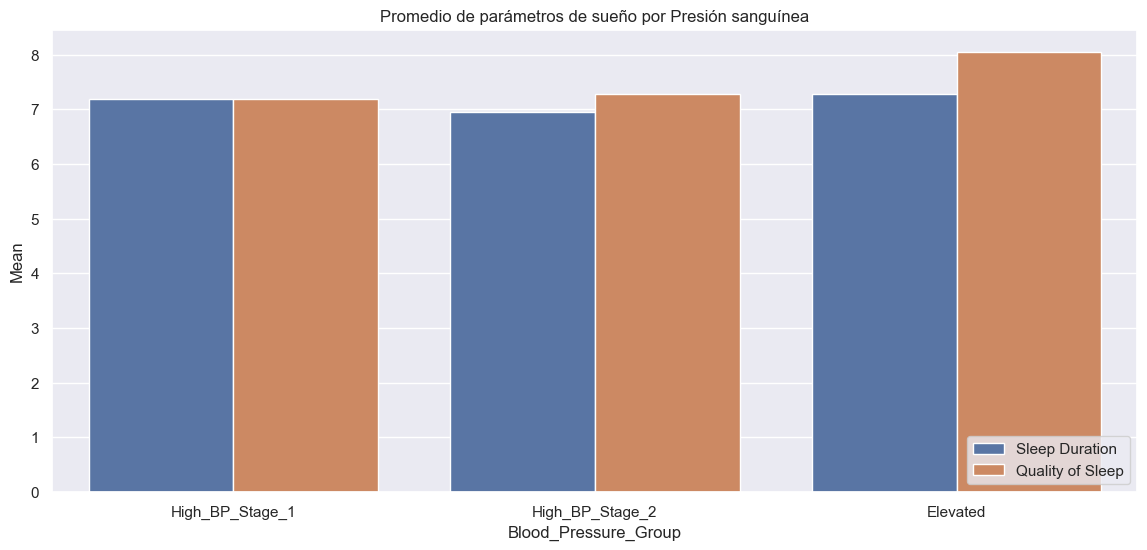

In [770]:
bpg_dq = ds.groupby('Blood_Pressure_Group')[['Sleep Duration', 'Quality of Sleep']].mean().reset_index()
bpg_dq = bpg_dq.sort_values(by='Quality of Sleep')
bpg_dq_melted = bpg_dq.melt(id_vars='Blood_Pressure_Group', var_name='Categories', value_name='Mean')

plt.figure(figsize=(14, 6))
sns.barplot(bpg_dq_melted, x='Blood_Pressure_Group', y='Mean', hue='Categories')
plt.title('Promedio de parámetros de sueño por Presión sanguínea')
plt.legend(loc='lower right')
plt.show()

In [771]:
pa_qua=ds.groupby('PA_Level_Group')['Quality of Sleep'].mean()
pa_qua.sort_values(ascending=False)

PA_Level_Group
Moderate_Activity    7.851852
High_Activity        7.586957
Low_Activity         6.787097
Name: Quality of Sleep, dtype: float64

<Axes: xlabel='PA_Level_Group', ylabel='Quality of Sleep'>

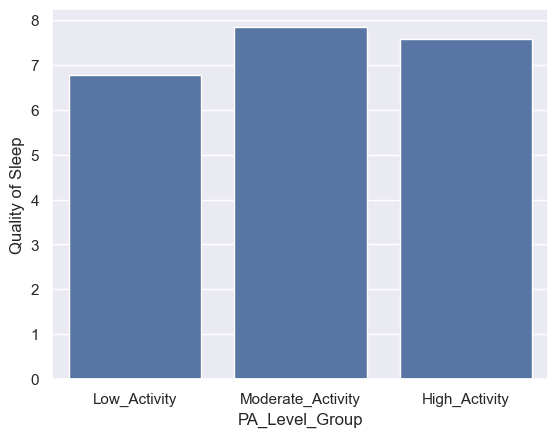

In [772]:
sns.barplot(ds, x='PA_Level_Group', y='Quality of Sleep', errorbar=None)

### Machine Learning

In [773]:
ds['Blood Pressure']=ds['Blood Pressure'].apply(lambda x: 0 if x in ['Normal', 'Elevated'] else 1)
ds['Blood_Pressure_Group']=ds['Blood_Pressure_Group'].apply(
    lambda x: 0 if x in ['Normal'] 
    else (1 if x in ['Elevated'] 
    else (2 if x in ['High_BP_Stage_1'] 
    else 3)))
ds['Age_Group']=ds['Age_Group'].apply(lambda x: 0 if x in ['Adult'] else 1)
ds['PA_Level_Group'] = ds['PA_Level_Group'].apply(
    lambda x: 0 if x in ['Low_Activity'] 
    else (1 if x in ['Moderate_Activity'] else 2))
ds['Heart Rate'] = pd.cut(ds['Heart Rate'], bins=4)
ds['Daily Steps'] = pd.cut(ds['Daily Steps'], bins=4)
ds['Sleep Duration'] = pd.cut(ds['Sleep Duration'], bins=3)
ds.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Age_Group,Blood_Pressure_Group,PA_Level_Group
0,Male,27,Software Engineer,"(5.797, 6.7]",6,42,6,Overweight,1,"(75.5, 80.75]","(2993.0, 4750.0]",None,126,83,0,2,0
1,Male,28,Doctor,"(5.797, 6.7]",6,60,8,Normal,1,"(70.25, 75.5]","(8250.0, 10000.0]",None,125,80,0,2,1
2,Male,28,Doctor,"(5.797, 6.7]",6,60,8,Normal,1,"(70.25, 75.5]","(8250.0, 10000.0]",None,125,80,0,2,1
3,Male,28,Sales Representative,"(5.797, 6.7]",4,30,8,Obese,1,"(80.75, 86.0]","(2993.0, 4750.0]",Sleep Apnea,140,90,0,3,0
4,Male,28,Sales Representative,"(5.797, 6.7]",4,30,8,Obese,1,"(80.75, 86.0]","(2993.0, 4750.0]",Sleep Apnea,140,90,0,3,0


In [774]:
LE = LabelEncoder()
categories=['Gender','Age','Occupation', 'Physical Activity Level', 'Sleep Duration',
            'BMI Category','Heart Rate','Daily Steps','Sleep Disorder']

for label in categories:
    ds[label]=LE.fit_transform(ds[label])

corr=ds.corr()
corr_max=corr.nlargest(8,"Sleep Disorder")

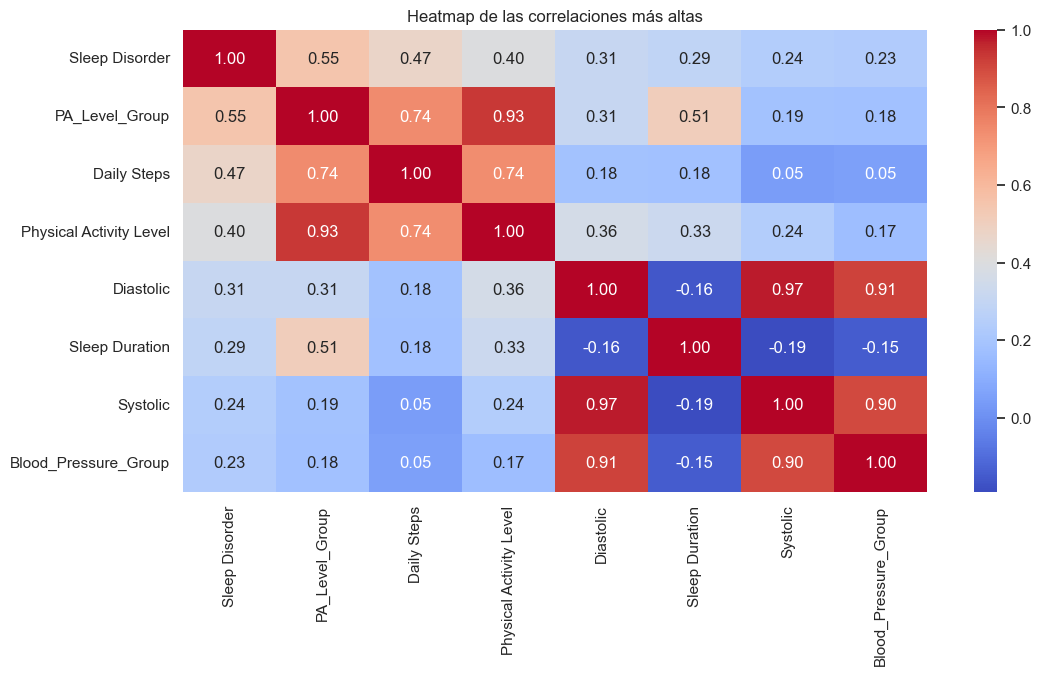

In [775]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_max.loc[corr_max.index, corr_max.index], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de las correlaciones más altas')
plt.show()

Valores cercanos a +1: Relación positiva fuerte. Cuando una variable aumenta, la otra también tiende a aumentar.

Valores cercanos a -1: Relación negativa fuerte. Cuando una variable aumenta, la otra tiende a disminuir.

Valores cercanos a 0: Relación débil o inexistente.

In [776]:
#ds.to_csv('Sleep_health_and_lifestyle_dataset1.csv')

In [777]:
def machinelearning():
    ds = pd.read_csv('Sleep_health_and_lifestyle_dataset1.csv')
    
    x = ds.drop(columns=['Sleep Disorder']) 
    y = ds['Sleep Disorder']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
    
    log_reg = LogisticRegression(max_iter=5000, random_state=42)
    log_reg.fit(x_train, y_train)
    
    coefficients = pd.DataFrame({
        'Feature': x.columns,
        'Coefficient': log_reg.coef_[0]
    }).sort_values(by='Coefficient', key=abs, ascending=False)
    
    y_pred = log_reg.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    return coefficients, accuracy

if __name__ == '__main__':
    coefficients, accuracy = machinelearning()


Exactitud del modelo: 0.95


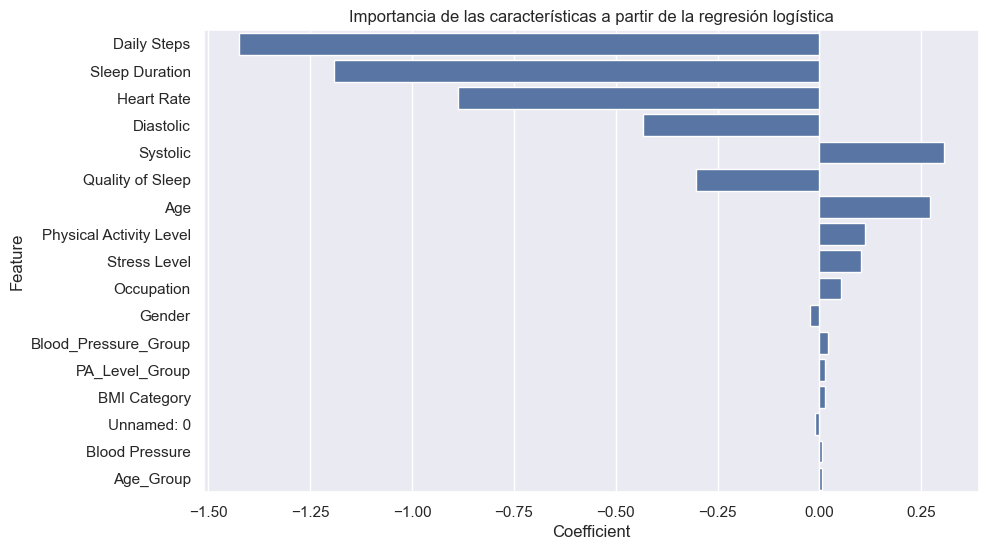

In [778]:
print(f"Exactitud del modelo: {accuracy:.2f}")

plt.figure(figsize=(10, 6))
sns.barplot(coefficients, x='Coefficient', y='Feature', orient='h')
plt.title('Importancia de las características a partir de la regresión logística')
plt.show()